In [1]:
import os

currentDirectory = os.getcwd()

currentDirectory

'C:\\Users\\user\\Desktop\\AI\\Assignment_2\\CNN_Code'

In [2]:
#Import the required libraries 

In [3]:
import numpy as np #Array operations
import matplotlib.pyplot as plt #show image
import os #join paths
import cv2 #image operations
from tqdm import tqdm #used to show the loading
import random
import pickle
import seaborn as sns
from PIL import Image 
from keras.optimizers import Adam
from tensorflow.keras import datasets, layers, models
import random

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, GlobalAveragePooling2D, Activation, Flatten, Conv2D,MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

from keras.optimizers import SGD
import time

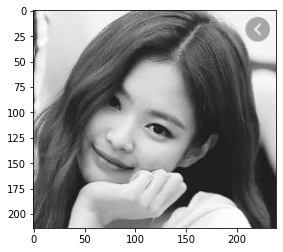

In [4]:
TRAIN_DATADIR = "BP/train"
TEST_DATADIR = "BP/test"

CATEGORIES = ["Jennie", "Jisoo","Lisa", "Rose"]

for category in CATEGORIES:
    path = os.path.join(TRAIN_DATADIR,category) #path to the BlackPink Members 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap= "gray") #make a graph 
        plt.show() #shows the image
        break
    break

In [5]:
print(img_array) #pixel values

[[130  84 117 ... 244 244 244]
 [113  74 113 ... 244 244 244]
 [103  71 111 ... 244 244 244]
 ...
 [ 53  56  61 ...  34  35  35]
 [ 56  61  67 ...  34  34  34]
 [ 57  64  69 ...  35  34  34]]


In [6]:
print(img_array.shape) #size of image

(214, 239)


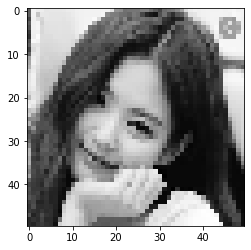

In [7]:
IMG_SIZE = 50 #reize image to make image 50x50

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap = "gray")
plt.show()

In [8]:
#training and Testing Data

In [9]:
training_data = []

def create_training_data():
    for traincategory in CATEGORIES:
        
        path = os.path.join(TRAIN_DATADIR,traincategory) #path to the blackpink members 
        class_num = CATEGORIES.index(traincategory) #make the categories to indices
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()
print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 76.73it/s]

600


In [10]:
Test_data = []

def create_testing_data():
    for testcategory in CATEGORIES:
        
        path = os.path.join(TEST_DATADIR,testcategory) #path to the blackpink members 
        class_num = CATEGORIES.index(testcategory) ##make the categories to indices
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                Test_data.append([new_array, class_num])
            except Exception as e:
                pass

create_testing_data()


100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:02<00:00, 51.33it/s]


In [11]:
random.shuffle(training_data) #shuffle the data
print("=======================")
print(CATEGORIES[0], "= 0")
print(CATEGORIES[1], "= 1")
print(CATEGORIES[2], "= 2")
print(CATEGORIES[3], "= 3")
print("=======================")
for sample in training_data[:10]: #10 numbers 
    print(sample[1])

Jennie = 0
Jisoo = 1
Lisa = 2
Rose = 3
2
0
0
1
0
0
3
2
0
3


In [12]:
#Data Preprocessing

In [13]:
x_train = []
y_train = []

x_test = []
y_test = []

#^ empty list x_train and y_train
# x_train is feature set
# y_train is labels 

for features, label in training_data:
    x_train.append(features)
    y_train.append(label)

for features, label in Test_data:
    x_test.append(features)
    y_test.append(label)

y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)    
    
# Normalize the data
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

    
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE,1) #requirement
y_train=np.array(y_train)

x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE,1) #requirement
y_test=np.array(y_test)




In [14]:
np.shape(x_train)

(600, 50, 50, 1)

In [15]:
import pickle

pickle_out = open("x_train.pickle", "wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [16]:
import pickle

pickle_in = open("x_train.pickle","rb")
x_train = pickle.load(pickle_in)


In [17]:
x_train[1]

array([[[0.78431373],
        [0.77254902],
        [0.76862745],
        ...,
        [0.21960784],
        [0.20784314],
        [0.21568627]],

       [[0.75686275],
        [0.75686275],
        [0.74901961],
        ...,
        [0.21960784],
        [0.20784314],
        [0.21568627]],

       [[0.72941176],
        [0.7372549 ],
        [0.72941176],
        ...,
        [0.22352941],
        [0.2       ],
        [0.15686275]],

       ...,

       [[0.06666667],
        [0.07058824],
        [0.11372549],
        ...,
        [0.05882353],
        [0.05490196],
        [0.0745098 ]],

       [[0.07843137],
        [0.07843137],
        [0.0745098 ],
        ...,
        [0.0745098 ],
        [0.07058824],
        [0.05882353]],

       [[0.09019608],
        [0.09019608],
        [0.08235294],
        ...,
        [0.07843137],
        [0.08235294],
        [0.0745098 ]]])

In [18]:
#Data augmentation

In [19]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [20]:
#CNN model with 3 Convolutional layers 

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(4))
model.add(Activation('softmax'))

opt = SGD(lr=0.01, momentum=0.9, decay=0, nesterov=False)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0

In [22]:
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train,batch_size=64,epochs=50,validation_data = (x_test,y_test),shuffle=True)

Epoch 1/50
10/10 [==============================] - 2s 176ms/step - loss: 1.0863 - accuracy: 0.5317 - val_loss: 1.2433 - val_accuracy: 0.4446
Epoch 2/50
10/10 [==============================] - 2s 188ms/step - loss: 1.0294 - accuracy: 0.5717 - val_loss: 1.2510 - val_accuracy: 0.4497
Epoch 3/50
10/10 [==============================] - 2s 167ms/step - loss: 1.0553 - accuracy: 0.5633 - val_loss: 1.2333 - val_accuracy: 0.4799
Epoch 4/50
10/10 [==============================] - 2s 179ms/step - loss: 1.0073 - accuracy: 0.5533 - val_loss: 1.2225 - val_accuracy: 0.4664
Epoch 5/50
10/10 [==============================] - 2s 167ms/step - loss: 1.0157 - accuracy: 0.5717 - val_loss: 1.2174 - val_accuracy: 0.4648
Epoch 6/50
10/10 [==============================] - 2s 172ms/step - loss: 1.0340 - accuracy: 0.5517 - val_loss: 1.2161 - val_accuracy: 0.4564
Epoch 7/50
10/10 [==============================] - 2s 178ms/step - loss: 1.0030 - accuracy: 0.5833 - val_loss: 1.1935 - val_accuracy: 0.5017
Epoch 

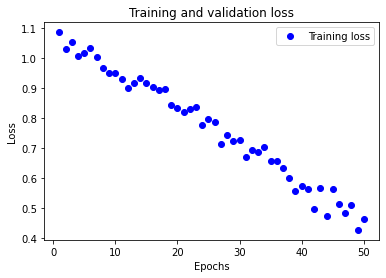

In [42]:
history_dict = history.history
loss_values = history_dict['loss']
#val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [41]:
#prediction (testing data)

In [32]:
labels=model.predict(x_test)
labels[1]

array([9.9152070e-01, 2.5523314e-03, 5.4594623e-03, 4.6745132e-04],
      dtype=float32)

In [33]:
labels1 = np.argmax(labels, axis=-1)    
labels1

array([0, 0, 2, 2, 0, 3, 3, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 3, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 2, 2, 3,
       0, 3, 3, 1, 1, 3, 2, 0, 1, 0, 1, 1, 0, 1, 3, 1, 2, 1, 1, 1, 2, 1,
       3, 1, 1, 2, 2, 1, 1, 1, 3, 3, 1, 1, 0, 0, 1, 0, 1, 0, 2, 3, 1, 0,
       3, 0, 0, 0, 3, 2, 0, 1, 0, 3, 1, 2, 3, 0, 0, 1, 0, 1, 2, 1, 0, 1,
       1, 1, 1, 0, 2, 1, 3, 1, 0, 2, 1, 3, 0, 1, 3, 1, 1, 3, 1, 0, 1, 0,
       1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 3, 3, 1, 1, 2, 1, 3, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 3, 0,
       0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 3, 2,

In [34]:
y_test1 = np.argmax(y_test, axis=-1)    
y_test1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, labels1))

              precision    recall  f1-score   support

           0       0.60      0.77      0.67       150
           1       0.67      0.45      0.54       148
           2       0.60      0.82      0.69       150
           3       0.64      0.43      0.51       148

    accuracy                           0.62       596
   macro avg       0.63      0.62      0.60       596
weighted avg       0.63      0.62      0.60       596



In [36]:
testscore = model.evaluate(x_test, y_test)
print('Test Loss:', testscore[0])
print('Test Accuracy:', testscore[1])

19/19 [==============================] - 0s 20ms/step - loss: 1.2021 - accuracy: 0.6174
Test Loss: 1.2020870447158813
Test Accuracy: 0.6174496412277222


In [37]:
#Saving the model

In [38]:
model.save('trained_model1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: trained_model1\assets


In [39]:
#this is to filter out into 12 images of 50x50 
sample = x_train[-25:-10]
sample = np.array(sample).reshape(-1, IMG_SIZE, IMG_SIZE,1)
np.shape(sample)

(15, 50, 50, 1)

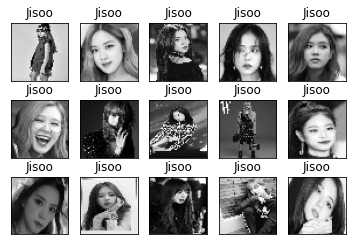

In [40]:
fig=plt.figure()
mm=[]
num=0
for data in sample:
    num=num+1

    img_data = data
    type(data)
    
    y = fig.add_subplot(3,5,num)
    orig = img_data.reshape(IMG_SIZE,IMG_SIZE)
    data = img_data.reshape(-1,IMG_SIZE,IMG_SIZE,1)
    mm.append(model.predict(data))



    if np.any(mm[num-1] >= 0.3) : 
        str_label='Rose'
    if np.any(mm[num-1] >= 0.4) : 
        str_label='Jennie'
    if np.any(mm[num-1] >= 0.5): 
        str_label='Jisoo'
    else: 
        str_label='Lisa'

        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)